100%|██████████| 19/19 [22:48<00:00, 72.04s/it]


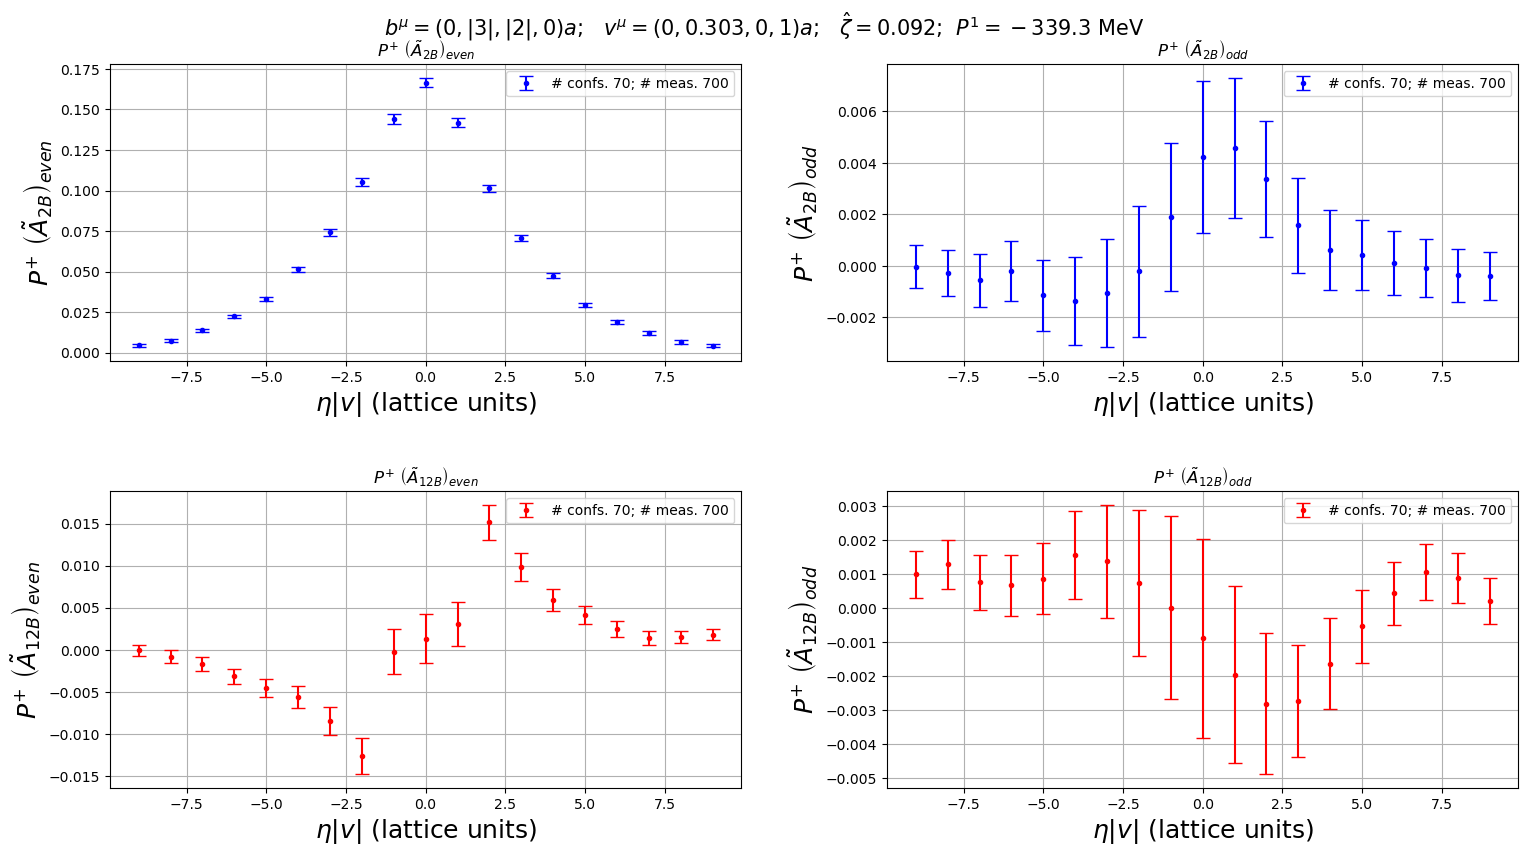

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from contextlib import ExitStack
from tqdm import tqdm
#lattice size a
a = 0.114

# plateau_fit
def plateau_fit(x, plateau_value):
    return np.full_like(x, plateau_value)



sources = [[0, 0, 0, 0], [8, 0, 0, 0], [16, 0, 0, 0], [24, 0, 0, 0], [0, 8, 0, 0], [0, 16, 0, 0], [0, 24, 0, 0], [0, 0, 8, 0], [0, 0, 16, 0], [0, 0, 24, 0]]

q = [0,0,0,0]
tsnk = 10
t = 10
psnk = [-1,0,0,0]



v3 = 1
v1 =  0.303023 * v3
S3 = 1
mod_P1 = 339.3
P0 = np.sqrt((np.square(1067))+(np.square(339.3)))
lattice_mod_P1 = 1
lattice_P0 = (np.sqrt((np.square(1067))+(np.square(339.3)))*a)/197
P_plus = (lattice_mod_P1+lattice_P0)/np.sqrt(2)
MN = (1067*a)/197


def extract_2pt_cfg_list(bl, b2):
    with ExitStack() as stack:
        no_cfgs = 0
        list_cfg_G2_t_psnk = []
        for stream in range(0,1):
            for cfgs in range(1776, 2052+1, 4): #1984 #2092
                if stream == 0:
                    file_path = f"/pscratch/sd/h/hari_8/save_prop_TMDs/h5_TMD_saved/h5_files_cfgs_0123_xyzt/save_TMD3pt__b_{bl}_2_0__v_03_0_1_eta9m9_cfg_b_corrected_{cfgs}_.h5"
                    #file_path = f"/pscratch/sd/h/hari_8/save_prop_TMDs/h5_TMD_saved/h5_files_cfgs_0123_xyzt/save_TMD3pt__b_{bl}_0_1__v_03_1_0_eta9m9_cfg_a_corrected_{cfgs-440}_.h5"
                    #file_path = f"/pscratch/sd/h/hari_8/save_prop_TMDs/h5_TMD_saved/h5_files_cfgs_0123_xyzt/save_TMD3pt_2pt_b_3-20_v_110_gnStapleFWprop_g5BWadjpropg5_psnk_m1_0_0_cfg_a_{cfgs-440}_.h5"
                    cfg = cfgs
                elif stream == 1:
                    file_path = f"/pscratch/sd/h/hari_8/save_prop_TMDs/h5_TMD_saved/h5_files_cfgs_0123_xyzt/save_TMD3pt__b_{bl}_-1_0__v_03_0_1_eta9m9_cfg_b_corrected_{cfgs}_.h5"
                    cfg = cfgs
                h5_file = stack.enter_context(h5py.File(file_path, "r"))
                no_cfgs = no_cfgs + 1
                per_src_G2_t_psnk = []
                for csrc in sources:
                    path_to_G2_t_psnk_c_vector = f"/cfg_{cfg}/TwoPT_proton3/x{csrc[0]}_y{csrc[1]}_z{csrc[2]}_t{csrc[3]}/PX{psnk[0]}_PY{psnk[1]}_PZ{psnk[2]}_T{t}"
                    c_array_G2_t_psnk = h5_file[path_to_G2_t_psnk_c_vector]
                    real_array_G2_t_psnk = (c_array_G2_t_psnk[()]).real
                    per_src_G2_t_psnk.append(real_array_G2_t_psnk[tsnk])
                list_cfg_G2_t_psnk.append(np.mean(per_src_G2_t_psnk))
    return list_cfg_G2_t_psnk

def extract_3pts_cfg_list_sivers_b2_2(tau, eta, bl):
    with ExitStack() as stack:
        list_cfg_G3_U_g1_real = []
        list_cfg_G3_D_g1_real = []
        list_cfg_G3_U_g1_imag = []
        list_cfg_G3_D_g1_imag = []
        list_cfg_G3_U_g8_real = []
        list_cfg_G3_D_g8_real = []
        list_cfg_G3_U_g8_imag = []
        list_cfg_G3_D_g8_imag = []
        list_cfg_G3_U_g2_real = []
        list_cfg_G3_D_g2_real = []
        list_cfg_G3_U_g2_imag = []
        list_cfg_G3_D_g2_imag = []
        list_cfg_G3_U_g3_real = []
        list_cfg_G3_D_g3_real = []
        list_cfg_G3_U_g3_imag = []
        list_cfg_G3_D_g3_imag = []
        no_cfgs = 0
        for stream in range(0,1):
            for cfgs in range(1776, 2052+1, 4): #2052
                if stream == 0:
                    file_path = f"/pscratch/sd/h/hari_8/save_prop_TMDs/h5_TMD_saved/h5_files_cfgs_0123_xyzt/save_TMD3pt__b_{bl}_2_0__v_03_0_1_eta9m9_cfg_b_corrected_{cfgs}_.h5"
                    #file_path = f"/pscratch/sd/h/hari_8/save_prop_TMDs/h5_TMD_saved/h5_files_cfgs_0123_xyzt/save_TMD3pt__b_{bl}_0_1__v_03_1_0_eta9m9_cfg_a_corrected_{cfgs-440}_.h5"
                    #file_path = f"/pscratch/sd/h/hari_8/save_prop_TMDs/h5_TMD_saved/h5_files_cfgs_0123_xyzt/save_TMD3pt_2pt_b_3-20_v_110_gnStapleFWprop_g5BWadjpropg5_psnk_m1_0_0_cfg_a_{cfgs-440}_.h5"
                    cfg = cfgs
                elif stream == 1:
                    file_path = f"/pscratch/sd/h/hari_8/save_prop_TMDs/h5_TMD_saved/h5_files_cfgs_0123_xyzt/save_TMD3pt__b_{bl}_-1_0__v_03_0_1_eta9m9_cfg_b_corrected_{cfgs}_.h5"
                    cfg = cfgs
                h5_file = stack.enter_context(h5py.File(file_path, "r"))
                no_cfgs = no_cfgs + 1
                
                per_src_G3_U_g1_real = []
                per_src_G3_D_g1_real = []
                per_src_G3_U_g1_imag = []
                per_src_G3_D_g1_imag = []
                    
                per_src_G3_U_g8_real = []
                per_src_G3_D_g8_real = []
                per_src_G3_U_g8_imag = []
                per_src_G3_D_g8_imag = []
                
                per_src_G3_U_g2_real = []
                per_src_G3_D_g2_real = []
                per_src_G3_U_g2_imag = []
                per_src_G3_D_g2_imag = []
                
                per_src_G3_U_g3_real = []
                per_src_G3_D_g3_real = []
                per_src_G3_U_g3_imag = []
                per_src_G3_D_g3_imag = []
                for csrc in sources:
                    
                    ## gamma 1 (n=4)
                    # 3pt U quark
                    path_to_G3_U_vector_g1 = f"/cfg_{cfg}/ThreePT_flavor_U/x{csrc[0]}_y{csrc[1]}_z{csrc[2]}_t{csrc[3]}/PX{psnk[0]}_PY{psnk[1]}_PZ{psnk[2]}_T{t}/g{1}/qx{q[0]}_qy{q[1]}_qz{q[2]}/eta{eta}"
                    c_array_G3_U_g1 = h5_file[path_to_G3_U_vector_g1]
                    array_G3_U_g1_real = (c_array_G3_U_g1[()]).real
                    array_G3_U_g1_imag = (c_array_G3_U_g1[()]).imag
                    
                    # 3pt D quark
                    path_to_G3_D_vector_g1 = f"/cfg_{cfg}/ThreePT_flavor_D/x{csrc[0]}_y{csrc[1]}_z{csrc[2]}_t{csrc[3]}/PX{psnk[0]}_PY{psnk[1]}_PZ{psnk[2]}_T{t}/g{1}/qx{q[0]}_qy{q[1]}_qz{q[2]}/eta{eta}"
                    c_array_G3_D_g1 = h5_file[path_to_G3_D_vector_g1]
                    array_G3_D_g1_real = (c_array_G3_D_g1[()]).real
                    array_G3_D_g1_imag = (c_array_G3_D_g1[()]).imag
                    
                    ## gamma 4 (n=8)
                    # 3pt U quark
                    path_to_G3_U_vector_g8 = f"/cfg_{cfg}/ThreePT_flavor_U/x{csrc[0]}_y{csrc[1]}_z{csrc[2]}_t{csrc[3]}/PX{psnk[0]}_PY{psnk[1]}_PZ{psnk[2]}_T{t}/g{8}/qx{q[0]}_qy{q[1]}_qz{q[2]}/eta{eta}"
                    c_array_G3_U_g8 = h5_file[path_to_G3_U_vector_g8]
                    array_G3_U_g8_real = (c_array_G3_U_g8[()]).real
                    array_G3_U_g8_imag = (c_array_G3_U_g8[()]).imag
                    
                    # 3pt D quark
                    path_to_G3_D_vector_g8 = f"/cfg_{cfg}/ThreePT_flavor_D/x{csrc[0]}_y{csrc[1]}_z{csrc[2]}_t{csrc[3]}/PX{psnk[0]}_PY{psnk[1]}_PZ{psnk[2]}_T{t}/g{8}/qx{q[0]}_qy{q[1]}_qz{q[2]}/eta{eta}"
                    c_array_G3_D_g8 = h5_file[path_to_G3_D_vector_g8]
                    array_G3_D_g8_real = (c_array_G3_D_g8[()]).real
                    array_G3_D_g8_imag = (c_array_G3_D_g8[()]).imag
                    
                    ## gamma 2 (n=2)
                    # 3pt U quark
                    path_to_G3_U_vector_g2 = f"/cfg_{cfg}/ThreePT_flavor_U/x{csrc[0]}_y{csrc[1]}_z{csrc[2]}_t{csrc[3]}/PX{psnk[0]}_PY{psnk[1]}_PZ{psnk[2]}_T{t}/g{2}/qx{q[0]}_qy{q[1]}_qz{q[2]}/eta{eta}"
                    c_array_G3_U_g2 = h5_file[path_to_G3_U_vector_g2]
                    array_G3_U_g2_real = (c_array_G3_U_g2[()]).real
                    array_G3_U_g2_imag = (c_array_G3_U_g2[()]).imag
                    
                    # 3pt D quark
                    path_to_G3_D_vector_g2 = f"/cfg_{cfg}/ThreePT_flavor_D/x{csrc[0]}_y{csrc[1]}_z{csrc[2]}_t{csrc[3]}/PX{psnk[0]}_PY{psnk[1]}_PZ{psnk[2]}_T{t}/g{2}/qx{q[0]}_qy{q[1]}_qz{q[2]}/eta{eta}"
                    c_array_G3_D_g2 = h5_file[path_to_G3_D_vector_g2]
                    array_G3_D_g2_real = (c_array_G3_D_g2[()]).real
                    array_G3_D_g2_imag = (c_array_G3_D_g2[()]).imag
                    
                    
                    ## gamma 3 (n=4)
                    # 3pt U quark
                    path_to_G3_U_vector_g3 = f"/cfg_{cfg}/ThreePT_flavor_U/x{csrc[0]}_y{csrc[1]}_z{csrc[2]}_t{csrc[3]}/PX{psnk[0]}_PY{psnk[1]}_PZ{psnk[2]}_T{t}/g{4}/qx{q[0]}_qy{q[1]}_qz{q[2]}/eta{eta}"
                    c_array_G3_U_g3 = h5_file[path_to_G3_U_vector_g3]
                    array_G3_U_g3_real = (c_array_G3_U_g3[()]).real
                    array_G3_U_g3_imag = (c_array_G3_U_g3[()]).imag
                    
                    # 3pt D quark
                    path_to_G3_D_vector_g3 = f"/cfg_{cfg}/ThreePT_flavor_D/x{csrc[0]}_y{csrc[1]}_z{csrc[2]}_t{csrc[3]}/PX{psnk[0]}_PY{psnk[1]}_PZ{psnk[2]}_T{t}/g{4}/qx{q[0]}_qy{q[1]}_qz{q[2]}/eta{eta}"
                    c_array_G3_D_g3 = h5_file[path_to_G3_D_vector_g3]
                    array_G3_D_g3_real = (c_array_G3_D_g3[()]).real
                    array_G3_D_g3_imag = (c_array_G3_D_g3[()]).imag

                    per_src_G3_U_g1_real.append(array_G3_U_g1_real[tau])
                    per_src_G3_D_g1_real.append(array_G3_D_g1_real[tau])
                    per_src_G3_U_g1_imag.append(array_G3_U_g1_imag[tau])
                    per_src_G3_D_g1_imag.append(array_G3_D_g1_imag[tau])
                    
                    per_src_G3_U_g8_real.append(array_G3_U_g8_real[tau])
                    per_src_G3_D_g8_real.append(array_G3_D_g8_real[tau])
                    per_src_G3_U_g8_imag.append(array_G3_U_g8_imag[tau])
                    per_src_G3_D_g8_imag.append(array_G3_D_g8_imag[tau])
                    
                    per_src_G3_U_g2_real.append(array_G3_U_g2_real[tau])
                    per_src_G3_D_g2_real.append(array_G3_D_g2_real[tau])
                    per_src_G3_U_g2_imag.append(array_G3_U_g2_imag[tau])
                    per_src_G3_D_g2_imag.append(array_G3_D_g2_imag[tau])
                    
                    per_src_G3_U_g3_real.append(array_G3_U_g3_real[tau])
                    per_src_G3_D_g3_real.append(array_G3_D_g3_real[tau])
                    per_src_G3_U_g3_imag.append(array_G3_U_g3_imag[tau])
                    per_src_G3_D_g3_imag.append(array_G3_D_g3_imag[tau])
                
                
                list_cfg_G3_U_g1_real.append(np.mean(per_src_G3_U_g1_real))
                list_cfg_G3_D_g1_real.append(np.mean(per_src_G3_D_g1_real))
                list_cfg_G3_U_g1_imag.append(np.mean(per_src_G3_U_g1_imag))
                list_cfg_G3_D_g1_imag.append(np.mean(per_src_G3_D_g1_imag))
                    
                list_cfg_G3_U_g8_real.append(np.mean(per_src_G3_U_g8_real))
                list_cfg_G3_D_g8_real.append(np.mean(per_src_G3_D_g8_real))
                list_cfg_G3_U_g8_imag.append(np.mean(per_src_G3_U_g8_imag))
                list_cfg_G3_D_g8_imag.append(np.mean(per_src_G3_D_g8_imag))
                
                    
                list_cfg_G3_U_g2_real.append(np.mean(per_src_G3_U_g2_real))
                list_cfg_G3_D_g2_real.append(np.mean(per_src_G3_D_g2_real))
                list_cfg_G3_U_g2_imag.append(np.mean(per_src_G3_U_g2_imag))
                list_cfg_G3_D_g2_imag.append(np.mean(per_src_G3_D_g2_imag))

                    
                list_cfg_G3_U_g3_real.append(np.mean(per_src_G3_U_g3_real))
                list_cfg_G3_D_g3_real.append(np.mean(per_src_G3_D_g3_real))
                list_cfg_G3_U_g3_imag.append(np.mean(per_src_G3_U_g3_imag))
                list_cfg_G3_D_g3_imag.append(np.mean(per_src_G3_D_g3_imag))
                   
             
    return list_cfg_G3_U_g1_real, list_cfg_G3_D_g1_real, list_cfg_G3_U_g1_imag, list_cfg_G3_D_g1_imag, list_cfg_G3_U_g8_real, list_cfg_G3_D_g8_real, list_cfg_G3_U_g8_imag, list_cfg_G3_D_g8_imag, list_cfg_G3_U_g2_real, list_cfg_G3_D_g2_real, list_cfg_G3_U_g2_imag, list_cfg_G3_D_g2_imag, list_cfg_G3_U_g3_real, list_cfg_G3_D_g3_real, list_cfg_G3_U_g3_imag, list_cfg_G3_D_g3_imag, no_cfgs

def extract_3pts_cfg_list_sivers_b2_m2(tau, eta, bl):
    with ExitStack() as stack:
        list_cfg_G3_U_g1_real = []
        list_cfg_G3_D_g1_real = []
        list_cfg_G3_U_g1_imag = []
        list_cfg_G3_D_g1_imag = []
        list_cfg_G3_U_g8_real = []
        list_cfg_G3_D_g8_real = []
        list_cfg_G3_U_g8_imag = []
        list_cfg_G3_D_g8_imag = []
        list_cfg_G3_U_g2_real = []
        list_cfg_G3_D_g2_real = []
        list_cfg_G3_U_g2_imag = []
        list_cfg_G3_D_g2_imag = []
        list_cfg_G3_U_g3_real = []
        list_cfg_G3_D_g3_real = []
        list_cfg_G3_U_g3_imag = []
        list_cfg_G3_D_g3_imag = []
        no_cfgs = 0
        for stream in range(0,1):
            for cfgs in range(1776, 2052+1, 4): #2052
                if stream == 0:
                    file_path = f"/pscratch/sd/h/hari_8/save_prop_TMDs/h5_TMD_saved/h5_files_cfgs_0123_xyzt/save_TMD3pt_2pt_b_{bl}-20_eta_n00_gnStapleFWprop_g5BWadjpropg5_psnk_m1_0_0_cfg_b_{cfgs}_.h5"
                    #file_path = f"/pscratch/sd/h/hari_8/save_prop_TMDs/h5_TMD_saved/h5_files_cfgs_0123_xyzt/save_TMD3pt__b_{bl}_0_1__v_03_1_0_eta9m9_cfg_a_corrected_{cfgs-440}_.h5"
                    #file_path = f"/pscratch/sd/h/hari_8/save_prop_TMDs/h5_TMD_saved/h5_files_cfgs_0123_xyzt/save_TMD3pt_2pt_b_3-20_v_110_gnStapleFWprop_g5BWadjpropg5_psnk_m1_0_0_cfg_a_{cfgs-440}_.h5"
                    cfg = cfgs
                elif stream == 1:
                    file_path = f"/pscratch/sd/h/hari_8/save_prop_TMDs/h5_TMD_saved/h5_files_cfgs_0123_xyzt/save_TMD3pt__b_{bl}_-1_0__v_03_0_1_eta9m9_cfg_b_corrected_{cfgs}_.h5"
                    cfg = cfgs
                h5_file = stack.enter_context(h5py.File(file_path, "r"))
                no_cfgs = no_cfgs + 1
                
                per_src_G3_U_g1_real = []
                per_src_G3_D_g1_real = []
                per_src_G3_U_g1_imag = []
                per_src_G3_D_g1_imag = []
                    
                per_src_G3_U_g8_real = []
                per_src_G3_D_g8_real = []
                per_src_G3_U_g8_imag = []
                per_src_G3_D_g8_imag = []
                
                per_src_G3_U_g2_real = []
                per_src_G3_D_g2_real = []
                per_src_G3_U_g2_imag = []
                per_src_G3_D_g2_imag = []
                
                per_src_G3_U_g3_real = []
                per_src_G3_D_g3_real = []
                per_src_G3_U_g3_imag = []
                per_src_G3_D_g3_imag = []
                for csrc in sources:
                    
                    ## gamma 1 (n=4)
                    # 3pt U quark
                    path_to_G3_U_vector_g1 = f"/cfg_{cfg}/ThreePT_flavor_U/x{csrc[0]}_y{csrc[1]}_z{csrc[2]}_t{csrc[3]}/PX{psnk[0]}_PY{psnk[1]}_PZ{psnk[2]}_T{t}/g{1}/qx{q[0]}_qy{q[1]}_qz{q[2]}/b1/eta{eta}"
                    c_array_G3_U_g1 = h5_file[path_to_G3_U_vector_g1]
                    array_G3_U_g1_real = (c_array_G3_U_g1[()]).real
                    array_G3_U_g1_imag = (c_array_G3_U_g1[()]).imag
                    
                    # 3pt D quark
                    path_to_G3_D_vector_g1 = f"/cfg_{cfg}/ThreePT_flavor_D/x{csrc[0]}_y{csrc[1]}_z{csrc[2]}_t{csrc[3]}/PX{psnk[0]}_PY{psnk[1]}_PZ{psnk[2]}_T{t}/g{1}/qx{q[0]}_qy{q[1]}_qz{q[2]}/b1/eta{eta}"
                    c_array_G3_D_g1 = h5_file[path_to_G3_D_vector_g1]
                    array_G3_D_g1_real = (c_array_G3_D_g1[()]).real
                    array_G3_D_g1_imag = (c_array_G3_D_g1[()]).imag
                    
                    ## gamma 4 (n=8)
                    # 3pt U quark
                    path_to_G3_U_vector_g8 = f"/cfg_{cfg}/ThreePT_flavor_U/x{csrc[0]}_y{csrc[1]}_z{csrc[2]}_t{csrc[3]}/PX{psnk[0]}_PY{psnk[1]}_PZ{psnk[2]}_T{t}/g{8}/qx{q[0]}_qy{q[1]}_qz{q[2]}/b1/eta{eta}"
                    c_array_G3_U_g8 = h5_file[path_to_G3_U_vector_g8]
                    array_G3_U_g8_real = (c_array_G3_U_g8[()]).real
                    array_G3_U_g8_imag = (c_array_G3_U_g8[()]).imag
                    
                    # 3pt D quark
                    path_to_G3_D_vector_g8 = f"/cfg_{cfg}/ThreePT_flavor_D/x{csrc[0]}_y{csrc[1]}_z{csrc[2]}_t{csrc[3]}/PX{psnk[0]}_PY{psnk[1]}_PZ{psnk[2]}_T{t}/g{8}/qx{q[0]}_qy{q[1]}_qz{q[2]}/b1/eta{eta}"
                    c_array_G3_D_g8 = h5_file[path_to_G3_D_vector_g8]
                    array_G3_D_g8_real = (c_array_G3_D_g8[()]).real
                    array_G3_D_g8_imag = (c_array_G3_D_g8[()]).imag
                    
                    ## gamma 2 (n=2)
                    # 3pt U quark
                    path_to_G3_U_vector_g2 = f"/cfg_{cfg}/ThreePT_flavor_U/x{csrc[0]}_y{csrc[1]}_z{csrc[2]}_t{csrc[3]}/PX{psnk[0]}_PY{psnk[1]}_PZ{psnk[2]}_T{t}/g{2}/qx{q[0]}_qy{q[1]}_qz{q[2]}/b1/eta{eta}"
                    c_array_G3_U_g2 = h5_file[path_to_G3_U_vector_g2]
                    array_G3_U_g2_real = (c_array_G3_U_g2[()]).real
                    array_G3_U_g2_imag = (c_array_G3_U_g2[()]).imag
                    
                    # 3pt D quark
                    path_to_G3_D_vector_g2 = f"/cfg_{cfg}/ThreePT_flavor_D/x{csrc[0]}_y{csrc[1]}_z{csrc[2]}_t{csrc[3]}/PX{psnk[0]}_PY{psnk[1]}_PZ{psnk[2]}_T{t}/g{2}/qx{q[0]}_qy{q[1]}_qz{q[2]}/b1/eta{eta}"
                    c_array_G3_D_g2 = h5_file[path_to_G3_D_vector_g2]
                    array_G3_D_g2_real = (c_array_G3_D_g2[()]).real
                    array_G3_D_g2_imag = (c_array_G3_D_g2[()]).imag
                    
                    
                    ## gamma 3 (n=4)
                    # 3pt U quark
                    path_to_G3_U_vector_g3 = f"/cfg_{cfg}/ThreePT_flavor_U/x{csrc[0]}_y{csrc[1]}_z{csrc[2]}_t{csrc[3]}/PX{psnk[0]}_PY{psnk[1]}_PZ{psnk[2]}_T{t}/g{4}/qx{q[0]}_qy{q[1]}_qz{q[2]}/b1/eta{eta}"
                    c_array_G3_U_g3 = h5_file[path_to_G3_U_vector_g3]
                    array_G3_U_g3_real = (c_array_G3_U_g3[()]).real
                    array_G3_U_g3_imag = (c_array_G3_U_g3[()]).imag
                    
                    # 3pt D quark
                    path_to_G3_D_vector_g3 = f"/cfg_{cfg}/ThreePT_flavor_D/x{csrc[0]}_y{csrc[1]}_z{csrc[2]}_t{csrc[3]}/PX{psnk[0]}_PY{psnk[1]}_PZ{psnk[2]}_T{t}/g{4}/qx{q[0]}_qy{q[1]}_qz{q[2]}/b1/eta{eta}"
                    c_array_G3_D_g3 = h5_file[path_to_G3_D_vector_g3]
                    array_G3_D_g3_real = (c_array_G3_D_g3[()]).real
                    array_G3_D_g3_imag = (c_array_G3_D_g3[()]).imag

                    per_src_G3_U_g1_real.append(array_G3_U_g1_real[tau])
                    per_src_G3_D_g1_real.append(array_G3_D_g1_real[tau])
                    per_src_G3_U_g1_imag.append(array_G3_U_g1_imag[tau])
                    per_src_G3_D_g1_imag.append(array_G3_D_g1_imag[tau])
                    
                    per_src_G3_U_g8_real.append(array_G3_U_g8_real[tau])
                    per_src_G3_D_g8_real.append(array_G3_D_g8_real[tau])
                    per_src_G3_U_g8_imag.append(array_G3_U_g8_imag[tau])
                    per_src_G3_D_g8_imag.append(array_G3_D_g8_imag[tau])
                    
                    per_src_G3_U_g2_real.append(array_G3_U_g2_real[tau])
                    per_src_G3_D_g2_real.append(array_G3_D_g2_real[tau])
                    per_src_G3_U_g2_imag.append(array_G3_U_g2_imag[tau])
                    per_src_G3_D_g2_imag.append(array_G3_D_g2_imag[tau])
                    
                    per_src_G3_U_g3_real.append(array_G3_U_g3_real[tau])
                    per_src_G3_D_g3_real.append(array_G3_D_g3_real[tau])
                    per_src_G3_U_g3_imag.append(array_G3_U_g3_imag[tau])
                    per_src_G3_D_g3_imag.append(array_G3_D_g3_imag[tau])
                
                
                list_cfg_G3_U_g1_real.append(np.mean(per_src_G3_U_g1_real))
                list_cfg_G3_D_g1_real.append(np.mean(per_src_G3_D_g1_real))
                list_cfg_G3_U_g1_imag.append(np.mean(per_src_G3_U_g1_imag))
                list_cfg_G3_D_g1_imag.append(np.mean(per_src_G3_D_g1_imag))
                    
                list_cfg_G3_U_g8_real.append(np.mean(per_src_G3_U_g8_real))
                list_cfg_G3_D_g8_real.append(np.mean(per_src_G3_D_g8_real))
                list_cfg_G3_U_g8_imag.append(np.mean(per_src_G3_U_g8_imag))
                list_cfg_G3_D_g8_imag.append(np.mean(per_src_G3_D_g8_imag))
                
                    
                list_cfg_G3_U_g2_real.append(np.mean(per_src_G3_U_g2_real))
                list_cfg_G3_D_g2_real.append(np.mean(per_src_G3_D_g2_real))
                list_cfg_G3_U_g2_imag.append(np.mean(per_src_G3_U_g2_imag))
                list_cfg_G3_D_g2_imag.append(np.mean(per_src_G3_D_g2_imag))

                    
                list_cfg_G3_U_g3_real.append(np.mean(per_src_G3_U_g3_real))
                list_cfg_G3_D_g3_real.append(np.mean(per_src_G3_D_g3_real))
                list_cfg_G3_U_g3_imag.append(np.mean(per_src_G3_U_g3_imag))
                list_cfg_G3_D_g3_imag.append(np.mean(per_src_G3_D_g3_imag))
                   
             
    return list_cfg_G3_U_g1_real, list_cfg_G3_D_g1_real, list_cfg_G3_U_g1_imag, list_cfg_G3_D_g1_imag, list_cfg_G3_U_g8_real, list_cfg_G3_D_g8_real, list_cfg_G3_U_g8_imag, list_cfg_G3_D_g8_imag, list_cfg_G3_U_g2_real, list_cfg_G3_D_g2_real, list_cfg_G3_U_g2_imag, list_cfg_G3_D_g2_imag, list_cfg_G3_U_g3_real, list_cfg_G3_D_g3_real, list_cfg_G3_U_g3_imag, list_cfg_G3_D_g3_imag, no_cfgs



def jackknife_ratio_for_tau_3pt_2pt(tau, eta, bl, b2):
    #2pt
    list_cfg_G2_t_psnk = extract_2pt_cfg_list(bl, b2)
    
    #3pt
    if b2 == 2:
        list_cfg_G3_U_g1_real, list_cfg_G3_D_g1_real, list_cfg_G3_U_g1_imag, list_cfg_G3_D_g1_imag, list_cfg_G3_U_g8_real, list_cfg_G3_D_g8_real, list_cfg_G3_U_g8_imag, list_cfg_G3_D_g8_imag, list_cfg_G3_U_g2_real, list_cfg_G3_D_g2_real, list_cfg_G3_U_g2_imag, list_cfg_G3_D_g2_imag, list_cfg_G3_U_g3_real, list_cfg_G3_D_g3_real, list_cfg_G3_U_g3_imag, list_cfg_G3_D_g3_imag, no_cfgs = extract_3pts_cfg_list_sivers_b2_2(tau, eta, bl)
    elif b2 == -2:   
        list_cfg_G3_U_g1_real, list_cfg_G3_D_g1_real, list_cfg_G3_U_g1_imag, list_cfg_G3_D_g1_imag, list_cfg_G3_U_g8_real, list_cfg_G3_D_g8_real, list_cfg_G3_U_g8_imag, list_cfg_G3_D_g8_imag, list_cfg_G3_U_g2_real, list_cfg_G3_D_g2_real, list_cfg_G3_U_g2_imag, list_cfg_G3_D_g2_imag, list_cfg_G3_U_g3_real, list_cfg_G3_D_g3_real, list_cfg_G3_U_g3_imag, list_cfg_G3_D_g3_imag, no_cfgs = extract_3pts_cfg_list_sivers_b2_m2(tau, eta, bl)
    
    
    G3_U_gp_real = (-np.mean(list_cfg_G3_U_g1_imag)+np.mean(list_cfg_G3_U_g8_real))/(np.sqrt(2)*2)
    G3_D_gp_real = (-np.mean(list_cfg_G3_D_g1_imag)+np.mean(list_cfg_G3_D_g8_real))/(np.sqrt(2)*2)
    
    G3_U_gp_imag = (1/(2*np.sqrt(2)*MN*b2*S3))*(-(np.mean(list_cfg_G3_U_g1_real)/2)-np.mean(list_cfg_G3_U_g8_imag)-(np.mean(list_cfg_G3_U_g2_real)*b2/(2*bl))+((v3*mod_P1*np.mean(list_cfg_G3_U_g3_real))/(2*v1*P0)))
    G3_D_gp_imag = (1/(2*np.sqrt(2)*MN*b2*S3))*(-(np.mean(list_cfg_G3_D_g1_real)/2)-np.mean(list_cfg_G3_D_g8_imag)-(np.mean(list_cfg_G3_D_g2_real)*b2/(2*bl))+((v3*mod_P1*np.mean(list_cfg_G3_D_g3_real))/(2*v1*P0)))
    
    #G3_U_gp_imag = (np.mean(list_cfg_G3_U_g1_real)+np.mean(list_cfg_G3_U_g2_real)+np.mean(list_cfg_G3_U_g8_imag))/(np.sqrt(2))
    #G3_D_gp_imag = (np.mean(list_cfg_G3_D_g1_real)+np.mean(list_cfg_G3_D_g2_real)+np.mean(list_cfg_G3_D_g8_imag))/(np.sqrt(2))
    
    
    #G3_U_gp_real = (np.mean(list_cfg_G3_U_g8_real))
    #G3_D_gp_real = (np.mean(list_cfg_G3_D_g8_real))
    
    #G3_U_gp_imag = (np.mean(list_cfg_G3_U_g8_imag))
    #G3_D_gp_imag = (np.mean(list_cfg_G3_D_g8_imag))
    
    
    #ratio 3pt to 2pt
    G3_U_D_gp_real = ((G3_U_gp_real)-(G3_D_gp_real))/np.mean(list_cfg_G2_t_psnk)
    G3_U_D_gp_imag = ((G3_U_gp_imag)-(G3_D_gp_imag))/np.mean(list_cfg_G2_t_psnk)
    
    # making jackknife set
    sigma_square_Ratio_gp_real = 0
    sigma_square_Ratio_gp_imag = 0
    for i in range(len(list_cfg_G3_U_g1_real)): #Jackknife
        #ratio 3pt to 2pt
        jkknife_G3_U_gp_real = (-np.mean( list_cfg_G3_U_g1_imag[:i] + list_cfg_G3_U_g1_imag[(i+1):] )+np.mean( list_cfg_G3_U_g8_real[:i] + list_cfg_G3_U_g8_real[(i+1):] ))/(np.sqrt(2)*2)
        jkknife_G3_D_gp_real = (-np.mean( list_cfg_G3_D_g1_imag[:i] + list_cfg_G3_D_g1_imag[(i+1):] )+np.mean( list_cfg_G3_D_g8_real[:i] + list_cfg_G3_D_g8_real[(i+1):] ))/(np.sqrt(2)*2)
        
        jkknife_G3_U_gp_imag = (1/(2*np.sqrt(2)*MN*b2*S3))*(-(np.mean( list_cfg_G3_U_g1_real[:i] + list_cfg_G3_U_g1_real[(i+1):] )/2)-np.mean( list_cfg_G3_U_g8_imag[:i] + list_cfg_G3_U_g8_imag[(i+1):] )-(np.mean( list_cfg_G3_U_g2_real[:i] + list_cfg_G3_U_g2_real[(i+1):] )*b2/(2*bl))+((v3*mod_P1*np.mean( list_cfg_G3_U_g3_real[:i] + list_cfg_G3_U_g3_real[(i+1):] ))/(2*v1*P0)))
        jkknife_G3_D_gp_imag = (1/(2*np.sqrt(2)*MN*b2*S3))*(-(np.mean( list_cfg_G3_D_g1_real[:i] + list_cfg_G3_D_g1_real[(i+1):] )/2)-np.mean( list_cfg_G3_D_g8_imag[:i] + list_cfg_G3_D_g8_imag[(i+1):] )-(np.mean( list_cfg_G3_D_g2_real[:i] + list_cfg_G3_D_g2_real[(i+1):] )*b2/(2*bl))+((v3*mod_P1*np.mean( list_cfg_G3_D_g3_real[:i] + list_cfg_G3_D_g3_real[(i+1):] ))/(2*v1*P0)))
    
        #jkknife_G3_U_gp_imag = (np.mean( list_cfg_G3_U_g1_real[:i] + list_cfg_G3_U_g1_real[(i+1):] )+np.mean( list_cfg_G3_U_g2_real[:i] + list_cfg_G3_U_g2_real[(i+1):] )+np.mean( list_cfg_G3_U_g8_imag[:i] + list_cfg_G3_U_g8_imag[(i+1):] ))/(np.sqrt(2))
        #jkknife_G3_D_gp_imag = (np.mean( list_cfg_G3_D_g1_real[:i] + list_cfg_G3_D_g1_real[(i+1):] )+np.mean( list_cfg_G3_D_g2_real[:i] + list_cfg_G3_D_g2_real[(i+1):] )+np.mean( list_cfg_G3_D_g8_imag[:i] + list_cfg_G3_D_g8_imag[(i+1):] ))/(np.sqrt(2))
        
        #jkknife_G3_U_gp_real = (np.mean( list_cfg_G3_U_g8_real[:i] + list_cfg_G3_U_g8_real[(i+1):] ))
        #jkknife_G3_D_gp_real = (np.mean( list_cfg_G3_D_g8_real[:i] + list_cfg_G3_D_g8_real[(i+1):] ))
    
        #jkknife_G3_U_gp_imag = (np.mean( list_cfg_G3_U_g8_imag[:i] + list_cfg_G3_U_g8_imag[(i+1):] ))
        #jkknife_G3_D_gp_imag = (np.mean( list_cfg_G3_D_g8_imag[:i] + list_cfg_G3_D_g8_imag[(i+1):] ))
        
        
        jkknife_G3_U_D_gp_real = ((jkknife_G3_U_gp_real)-(jkknife_G3_D_gp_real))/(np.mean( list_cfg_G2_t_psnk[:(i)] + list_cfg_G2_t_psnk[(i+1):] ))
        jkknife_G3_U_D_gp_imag = ((jkknife_G3_U_gp_imag)-(jkknife_G3_D_gp_imag))/(np.mean( list_cfg_G2_t_psnk[:(i)] + list_cfg_G2_t_psnk[(i+1):] ))
    
        sigma_square_Ratio_gp_real = sigma_square_Ratio_gp_real + np.square(G3_U_D_gp_real-jkknife_G3_U_D_gp_real)
        sigma_square_Ratio_gp_imag = sigma_square_Ratio_gp_imag + np.square(G3_U_D_gp_imag-jkknife_G3_U_D_gp_imag)
    error_G3_U_D_gp_real = np.sqrt(((no_cfgs-1)/(no_cfgs))*sigma_square_Ratio_gp_real)
    error_G3_U_D_gp_imag = np.sqrt(((no_cfgs-1)/(no_cfgs))*sigma_square_Ratio_gp_imag)
    return G3_U_D_gp_real, error_G3_U_D_gp_real, G3_U_D_gp_imag, error_G3_U_D_gp_imag, no_cfgs



def ratio_3pt_2pt_plateau(plateau_t_i_re, plateau_t_f_re, plateau_t_i_im, plateau_t_f_im, eta, bl, b2):
    G3_U_D_gp_real_list = []
    error_G3_U_D_gp_real_list = []
    G3_U_D_gp_imag_list = []
    error_G3_U_D_gp_imag_list = []
    for tau in (range(0, tsnk+1)):
        G3_U_D_gp_real, error_G3_U_D_gp_real, G3_U_D_gp_imag, error_G3_U_D_gp_imag, no_cfgs = jackknife_ratio_for_tau_3pt_2pt(tau, eta, bl, b2)
        G3_U_D_gp_real_list.append(G3_U_D_gp_real)
        error_G3_U_D_gp_real_list.append(error_G3_U_D_gp_real)
        G3_U_D_gp_imag_list.append(G3_U_D_gp_imag)
        error_G3_U_D_gp_imag_list.append(error_G3_U_D_gp_imag)
      
    ####################### Curve fitting #######################
    time_for_plateau_re = list(range(plateau_t_i_re, plateau_t_f_re + 1))
    time_for_plateau_im = list(range(plateau_t_i_im, plateau_t_f_im + 1))
    G3_U_D_gp_real_list_plateau = []
    error_G3_U_D_gp_real_list_plateau = []
    G3_U_D_gp_imag_list_plateau = []
    error_G3_U_D_gp_imag_list_plateau = []
    for t_plateau in range(len(time_for_plateau_re)):
        G3_U_D_gp_real_list_plateau.append(G3_U_D_gp_real_list[t_plateau+plateau_t_i_re])
        error_G3_U_D_gp_real_list_plateau.append(error_G3_U_D_gp_real_list[t_plateau+plateau_t_i_re])
    for t_plateau in range(len(time_for_plateau_im)):   
        G3_U_D_gp_imag_list_plateau.append(G3_U_D_gp_imag_list[t_plateau+plateau_t_i_im])
        error_G3_U_D_gp_imag_list_plateau.append(error_G3_U_D_gp_imag_list[t_plateau+plateau_t_i_im])
        
    params_gp_real, cov_gp_real = curve_fit(plateau_fit, time_for_plateau_re, G3_U_D_gp_real_list_plateau, sigma = error_G3_U_D_gp_real_list_plateau, absolute_sigma=True)
    G3_U_D_gp_real_plateau = params_gp_real
    error_G3_U_D_gp_real_plateau = np.sqrt(np.diag(cov_gp_real))
    
    params_gp_imag, cov_gp_imag = curve_fit(plateau_fit, time_for_plateau_im, G3_U_D_gp_imag_list_plateau, sigma = error_G3_U_D_gp_imag_list_plateau, absolute_sigma=True)
    G3_U_D_gp_imag_plateau = params_gp_imag
    error_G3_U_D_gp_imag_plateau = np.sqrt(np.diag(cov_gp_imag))
    
    
    #siverse_ratio =  -G3_U_D_gp_imag_plateau[0]/(b*G3_U_D_gp_real_plateau[0])
    #error_siverse_ratio = siverse_ratio * np.sqrt(np.square((error_G3_U_D_gp_imag_plateau[0])/(G3_U_D_gp_imag_plateau[0])+np.square((error_G3_U_D_gp_real_plateau[0])/(G3_U_D_gp_real_plateau[0]))))
    
    phi_gp_real = G3_U_D_gp_real_plateau[0]
    error_phi_gp_real = error_G3_U_D_gp_real_plateau[0]
    
    phi_gp_imag = G3_U_D_gp_imag_plateau[0]
    error_phi_gp_imag = error_G3_U_D_gp_imag_plateau[0]

    return phi_gp_real, abs(error_phi_gp_real), phi_gp_imag, abs(error_phi_gp_imag), no_cfgs


def plot_gamma_plus_3pt_Re_Im(bl, b2):
    phi_gp_real_list_eta = []
    error_phi_gp_real_list_eta = []
    phi_gp_imag_list_eta = []
    error_phi_gp_imag_list_eta = []
    for eta in tqdm(range(-9, 1+9, 1)):
        phi_gp_real, error_phi_gp_real, phi_gp_imag, error_phi_gp_imag, no_cfgs = ratio_3pt_2pt_plateau(4,6,4,6, eta, bl, b2) 
        phi_gp_real_list_eta.append(phi_gp_real)
        error_phi_gp_real_list_eta.append(error_phi_gp_real)
        phi_gp_imag_list_eta.append(phi_gp_imag)
        error_phi_gp_imag_list_eta.append(error_phi_gp_imag)
    time_for_plot = list(range(-9, 1 + 9))
    fig, axs = plt.subplots(1, 2, figsize=(15, 7)) 
    axs[0].errorbar(time_for_plot, phi_gp_real_list_eta, yerr=error_phi_gp_real_list_eta, fmt='o', markersize=3, capsize=5, color='blue', label="# confs. %d; # meas. %d" % (no_cfgs, 10 * no_cfgs))
    axs[0].set_ylabel("$P^{+}~\\tilde{A}_{2B}$", fontsize=18)
    axs[0].set_xlabel("$\eta|v|$ (lattice units)", fontsize=18)
    axs[0].set_title("$P^{+}~\\tilde{A}_{2B}$", fontsize=12)
    axs[0].legend(fontsize=10)
    axs[0].grid(True)
    
    axs[1].errorbar(time_for_plot, phi_gp_imag_list_eta, yerr=error_phi_gp_imag_list_eta, fmt='o', markersize=3, capsize=5, color='Red', label="# confs. %d; # meas. %d" % (no_cfgs, 10 * no_cfgs))
    axs[1].set_ylabel("$P^{+}~\\tilde{A}_{12B}$", fontsize=18)
    axs[1].set_xlabel("$\eta|v|$ (lattice units)", fontsize=18)
    axs[1].set_title("$P^{+}~\\tilde{A}_{12B}$", fontsize=12)
    axs[1].legend(fontsize=10)
    axs[1].grid(True)
    
    plt.tight_layout(pad=3.3)
    fig.suptitle("$b^{\\mu}=(0,%d,-1,0)a$;   $v^{\\mu}=(0,0.303,0,1)a$;   $\\hat{\\zeta}=0.092$;  $P^{1}=-339.3\\text{ MeV}$" %(bl), fontsize=15) 
    plt.savefig("A2B_A12B_b%dm10_cfgb_.pdf"%(bl), dpi=50000)
    plt.show()
    return

def plot_gamma_plus_3pt_Re_Im_even_odd(bl, b2):
    phi_gp_real_list_eta_even = []
    error_phi_gp_real_list_eta_even = []
    phi_gp_real_list_eta_odd = []
    error_phi_gp_real_list_eta_odd = []
    phi_gp_imag_list_eta_even = []
    error_phi_gp_imag_list_eta_even = []
    phi_gp_imag_list_eta_odd = []
    error_phi_gp_imag_list_eta_odd = []
    for eta in tqdm(range(-9, 1+9, 1)):
        phi_gp_real_plus_bl, error_phi_gp_real_plus_bl, phi_gp_imag_plus_bl, error_phi_gp_imag_plus_bl, no_cfgs = ratio_3pt_2pt_plateau(4,6,4,6, eta, bl, b2)
        phi_gp_real_minus_bl, error_phi_gp_real_minus_bl, phi_gp_imag_minus_bl, error_phi_gp_imag_minus_bl, no_cfgs = ratio_3pt_2pt_plateau(4,6,4,6, eta, -bl, b2)
        
        phi_gp_real_list_eta_even.append((phi_gp_real_plus_bl+phi_gp_real_minus_bl)/2)
        phi_gp_real_list_eta_odd.append((phi_gp_real_plus_bl-phi_gp_real_minus_bl)/2)
        
        error_phi_gp_real_list_eta_even.append((np.sqrt(np.square(error_phi_gp_real_plus_bl)+np.square(error_phi_gp_real_minus_bl)))/2)
        error_phi_gp_real_list_eta_odd.append((np.sqrt(np.square(error_phi_gp_real_plus_bl)+np.square(error_phi_gp_real_minus_bl)))/2)
        
        phi_gp_imag_list_eta_even.append((phi_gp_imag_plus_bl+phi_gp_imag_minus_bl)/2)
        phi_gp_imag_list_eta_odd.append((phi_gp_imag_plus_bl-phi_gp_imag_minus_bl)/2)
        
        error_phi_gp_imag_list_eta_even.append((np.sqrt(np.square(error_phi_gp_imag_plus_bl)+np.square(error_phi_gp_imag_minus_bl)))/2)
        error_phi_gp_imag_list_eta_odd.append((np.sqrt(np.square(error_phi_gp_imag_plus_bl)+np.square(error_phi_gp_imag_minus_bl)))/2)
        
    time_for_plot = list(range(-9, 1 + 9))
    fig, axs = plt.subplots(2, 2, figsize=(16, 9)) 
    axs[0, 0].errorbar(time_for_plot, phi_gp_real_list_eta_even, yerr=error_phi_gp_real_list_eta_even, fmt='o', markersize=3, capsize=5, color='blue', label="# confs. %d; # meas. %d" % (no_cfgs, 10 * no_cfgs))
    axs[0, 0].set_ylabel("$P^{+}~\\left(\\tilde{A}_{2B}\\right)_{even}$", fontsize=18)
    axs[0, 0].set_xlabel("$\eta|v|$ (lattice units)", fontsize=18)
    axs[0, 0].set_title("$P^{+}~\\left(\\tilde{A}_{2B}\\right)_{even}$", fontsize=12)
    axs[0, 0].legend(fontsize=10)
    axs[0, 0].grid(True)
    
    axs[0, 1].errorbar(time_for_plot, phi_gp_real_list_eta_odd, yerr=error_phi_gp_real_list_eta_odd, fmt='o', markersize=3, capsize=5, color='blue', label="# confs. %d; # meas. %d" % (no_cfgs, 10 * no_cfgs))
    axs[0, 1].set_ylabel("$P^{+}~\\left(\\tilde{A}_{2B}\\right)_{odd}$", fontsize=18)
    axs[0, 1].set_xlabel("$\eta|v|$ (lattice units)", fontsize=18)
    axs[0, 1].set_title("$P^{+}~\\left(\\tilde{A}_{2B}\\right)_{odd}$", fontsize=12)
    axs[0, 1].legend(fontsize=10)
    axs[0, 1].grid(True)
    
    axs[1, 0].errorbar(time_for_plot, phi_gp_imag_list_eta_even, yerr=error_phi_gp_imag_list_eta_even, fmt='o', markersize=3, capsize=5, color='red', label="# confs. %d; # meas. %d" % (no_cfgs, 10 * no_cfgs))
    axs[1, 0].set_ylabel("$P^{+}~\\left(\\tilde{A}_{12B}\\right)_{even}$", fontsize=18)
    axs[1, 0].set_xlabel("$\eta|v|$ (lattice units)", fontsize=18)
    axs[1, 0].set_title("$P^{+}~\\left(\\tilde{A}_{12B}\\right)_{even}$", fontsize=12)
    axs[1, 0].legend(fontsize=10)
    axs[1, 0].grid(True)
    
    axs[1, 1].errorbar(time_for_plot, phi_gp_imag_list_eta_odd, yerr=error_phi_gp_imag_list_eta_odd, fmt='o', markersize=3, capsize=5, color='red', label="# confs. %d; # meas. %d" % (no_cfgs, 10 * no_cfgs))
    axs[1, 1].set_ylabel("$P^{+}~\\left(\\tilde{A}_{12B}\\right)_{odd}$", fontsize=18)
    axs[1, 1].set_xlabel("$\eta|v|$ (lattice units)", fontsize=18)
    axs[1, 1].set_title("$P^{+}~\\left(\\tilde{A}_{12B}\\right)_{odd}$", fontsize=12)
    axs[1, 1].legend(fontsize=10)
    axs[1, 1].grid(True)
    
    plt.tight_layout(pad=3.3)
    fig.suptitle("$b^{\\mu}=(0,|%d|,-1,0)a$;   $v^{\\mu}=(0,0.303,0,1)a$;   $\\hat{\\zeta}=0.092$;  $P^{1}=-339.3\\text{ MeV}$" %(bl), fontsize=15) 
    plt.savefig("A2B_A12B_b%dm10_even_odd_cfgb_.pdf"%(bl), dpi=50000)
    plt.show()
    return

def plot_gamma_plus_3pt_Re_Im_even_odd_bl__plus_minus_b2(bl, b2):
    phi_gp_real_list_eta_even = []
    error_phi_gp_real_list_eta_even = []
    phi_gp_real_list_eta_odd = []
    error_phi_gp_real_list_eta_odd = []
    phi_gp_imag_list_eta_even = []
    error_phi_gp_imag_list_eta_even = []
    phi_gp_imag_list_eta_odd = []
    error_phi_gp_imag_list_eta_odd = []
    for eta in tqdm(range(-9, 1+9, 1)):
        phi_gp_real_plus_bl_plus_b2, error_phi_gp_real_plus_bl_plus_b2, phi_gp_imag_plus_bl_plus_b2, error_phi_gp_imag_plus_bl_plus_b2, no_cfgs = ratio_3pt_2pt_plateau(4,6,4,6, eta, bl, b2)
        phi_gp_real_minus_bl_plus_b2, error_phi_gp_real_minus_bl_plus_b2, phi_gp_imag_minus_bl_plus_b2, error_phi_gp_imag_minus_bl_plus_b2, no_cfgs = ratio_3pt_2pt_plateau(4,6,4,6, eta, -bl, b2)
        phi_gp_real_plus_bl_minus_b2, error_phi_gp_real_plus_bl_minus_b2, phi_gp_imag_plus_bl_minus_b2, error_phi_gp_imag_plus_bl_minus_b2, no_cfgs = ratio_3pt_2pt_plateau(4,6,4,6, eta, bl, -b2)
        phi_gp_real_minus_bl_minus_b2, error_phi_gp_real_minus_bl_minus_b2, phi_gp_imag_minus_bl_minus_b2, error_phi_gp_imag_minus_bl_minus_b2, no_cfgs = ratio_3pt_2pt_plateau(4,6,4,6, eta, -bl, -b2)
        
        phi_gp_real_list_eta_even_plus_b2 = ((phi_gp_real_plus_bl_plus_b2+phi_gp_real_minus_bl_plus_b2)/2)
        phi_gp_real_list_eta_odd_plus_b2 = ((phi_gp_real_plus_bl_plus_b2-phi_gp_real_minus_bl_plus_b2)/2)
        
        error_phi_gp_real_list_eta_even_plus_b2 = ((np.sqrt(np.square(error_phi_gp_real_plus_bl_plus_b2)+np.square(error_phi_gp_real_minus_bl_plus_b2)))/2)
        error_phi_gp_real_list_eta_odd_plus_b2 = ((np.sqrt(np.square(error_phi_gp_real_plus_bl_plus_b2)+np.square(error_phi_gp_real_minus_bl_plus_b2)))/2)
        
        phi_gp_imag_list_eta_even_plus_b2 = ((phi_gp_imag_plus_bl_plus_b2+phi_gp_imag_minus_bl_plus_b2)/2)
        phi_gp_imag_list_eta_odd_plus_b2 = ((phi_gp_imag_plus_bl_plus_b2-phi_gp_imag_minus_bl_plus_b2)/2)
        
        error_phi_gp_imag_list_eta_even_plus_b2 = ((np.sqrt(np.square(error_phi_gp_imag_plus_bl_plus_b2)+np.square(error_phi_gp_imag_minus_bl_plus_b2)))/2)
        error_phi_gp_imag_list_eta_odd_plus_b2 = ((np.sqrt(np.square(error_phi_gp_imag_plus_bl_plus_b2)+np.square(error_phi_gp_imag_minus_bl_plus_b2)))/2)
         
        ########    
        phi_gp_real_list_eta_even_minus_b2 = ((phi_gp_real_plus_bl_minus_b2+phi_gp_real_minus_bl_minus_b2)/2)
        phi_gp_real_list_eta_odd_minus_b2 = ((phi_gp_real_plus_bl_minus_b2-phi_gp_real_minus_bl_minus_b2)/2)
        
        error_phi_gp_real_list_eta_even_minus_b2 = ((np.sqrt(np.square(error_phi_gp_real_plus_bl_minus_b2)+np.square(error_phi_gp_real_minus_bl_minus_b2)))/2)
        error_phi_gp_real_list_eta_odd_minus_b2 = ((np.sqrt(np.square(error_phi_gp_real_plus_bl_minus_b2)+np.square(error_phi_gp_real_minus_bl_minus_b2)))/2)
        
        phi_gp_imag_list_eta_even_minus_b2 = ((phi_gp_imag_plus_bl_minus_b2+phi_gp_imag_minus_bl_minus_b2)/2)
        phi_gp_imag_list_eta_odd_minus_b2 = ((phi_gp_imag_plus_bl_minus_b2-phi_gp_imag_minus_bl_minus_b2)/2)
        
        error_phi_gp_imag_list_eta_even_minus_b2 = ((np.sqrt(np.square(error_phi_gp_imag_plus_bl_minus_b2)+np.square(error_phi_gp_imag_minus_bl_minus_b2)))/2)
        error_phi_gp_imag_list_eta_odd_minus_b2 = ((np.sqrt(np.square(error_phi_gp_imag_plus_bl_minus_b2)+np.square(error_phi_gp_imag_minus_bl_minus_b2)))/2)
        
        #######
        phi_gp_real_list_eta_even.append((phi_gp_real_list_eta_even_plus_b2+phi_gp_real_list_eta_even_minus_b2)/2)
        error_phi_gp_real_list_eta_even.append(0.5*(np.sqrt(np.square(error_phi_gp_real_list_eta_even_plus_b2)+np.square(error_phi_gp_real_list_eta_even_minus_b2))))
        
        phi_gp_real_list_eta_odd.append((phi_gp_real_list_eta_odd_plus_b2+phi_gp_real_list_eta_odd_minus_b2)/2)
        error_phi_gp_real_list_eta_odd.append(0.5*(np.sqrt(np.square(error_phi_gp_real_list_eta_odd_plus_b2)+np.square(error_phi_gp_real_list_eta_odd_minus_b2))))
        
        phi_gp_imag_list_eta_even.append((phi_gp_imag_list_eta_even_plus_b2+phi_gp_imag_list_eta_even_minus_b2)/2)
        error_phi_gp_imag_list_eta_even.append(0.5*(np.sqrt(np.square(error_phi_gp_imag_list_eta_even_plus_b2)+np.square(error_phi_gp_imag_list_eta_even_minus_b2))))
        
        phi_gp_imag_list_eta_odd.append((phi_gp_imag_list_eta_odd_plus_b2+phi_gp_imag_list_eta_odd_minus_b2)/2)
        error_phi_gp_imag_list_eta_odd.append(0.5*(np.sqrt(np.square(error_phi_gp_imag_list_eta_odd_plus_b2)+np.square(error_phi_gp_imag_list_eta_odd_minus_b2))))
        
    time_for_plot = list(range(-9, 1 + 9))
    fig, axs = plt.subplots(2, 2, figsize=(16, 9)) 
    axs[0, 0].errorbar(time_for_plot, phi_gp_real_list_eta_even, yerr=error_phi_gp_real_list_eta_even, fmt='o', markersize=3, capsize=5, color='blue', label="# confs. %d; # meas. %d" % (no_cfgs, 10 * no_cfgs))
    axs[0, 0].set_ylabel("$P^{+}~\\left(\\tilde{A}_{2B}\\right)_{even}$", fontsize=18)
    axs[0, 0].set_xlabel("$\eta|v|$ (lattice units)", fontsize=18)
    axs[0, 0].set_title("$P^{+}~\\left(\\tilde{A}_{2B}\\right)_{even}$", fontsize=12)
    axs[0, 0].legend(fontsize=10)
    axs[0, 0].grid(True)
    
    axs[0, 1].errorbar(time_for_plot, phi_gp_real_list_eta_odd, yerr=error_phi_gp_real_list_eta_odd, fmt='o', markersize=3, capsize=5, color='blue', label="# confs. %d; # meas. %d" % (no_cfgs, 10 * no_cfgs))
    axs[0, 1].set_ylabel("$P^{+}~\\left(\\tilde{A}_{2B}\\right)_{odd}$", fontsize=18)
    axs[0, 1].set_xlabel("$\eta|v|$ (lattice units)", fontsize=18)
    axs[0, 1].set_title("$P^{+}~\\left(\\tilde{A}_{2B}\\right)_{odd}$", fontsize=12)
    axs[0, 1].legend(fontsize=10)
    axs[0, 1].grid(True)
    
    axs[1, 0].errorbar(time_for_plot, phi_gp_imag_list_eta_even, yerr=error_phi_gp_imag_list_eta_even, fmt='o', markersize=3, capsize=5, color='red', label="# confs. %d; # meas. %d" % (no_cfgs, 10 * no_cfgs))
    axs[1, 0].set_ylabel("$P^{+}~\\left(\\tilde{A}_{12B}\\right)_{even}$", fontsize=18)
    axs[1, 0].set_xlabel("$\eta|v|$ (lattice units)", fontsize=18)
    axs[1, 0].set_title("$P^{+}~\\left(\\tilde{A}_{12B}\\right)_{even}$", fontsize=12)
    axs[1, 0].legend(fontsize=10)
    axs[1, 0].grid(True)
    
    axs[1, 1].errorbar(time_for_plot, phi_gp_imag_list_eta_odd, yerr=error_phi_gp_imag_list_eta_odd, fmt='o', markersize=3, capsize=5, color='red', label="# confs. %d; # meas. %d" % (no_cfgs, 10 * no_cfgs))
    axs[1, 1].set_ylabel("$P^{+}~\\left(\\tilde{A}_{12B}\\right)_{odd}$", fontsize=18)
    axs[1, 1].set_xlabel("$\eta|v|$ (lattice units)", fontsize=18)
    axs[1, 1].set_title("$P^{+}~\\left(\\tilde{A}_{12B}\\right)_{odd}$", fontsize=12)
    axs[1, 1].legend(fontsize=10)
    axs[1, 1].grid(True)
    
    plt.tight_layout(pad=3.3)
    fig.suptitle("$b^{\\mu}=(0,|%d|,|2|,0)a$;   $v^{\\mu}=(0,0.303,0,1)a$;   $\\hat{\\zeta}=0.092$;  $P^{1}=-339.3\\text{ MeV}$" %(bl), fontsize=15) 
    plt.savefig("A2B_A12B_b%d20_even_odd_cfgb_pb2_mb2.pdf"%(bl), dpi=50000)
    plt.show()
    return


plot_gamma_plus_3pt_Re_Im_even_odd_bl__plus_minus_b2(bl=3, b2=2)

